## MATH 440 Regression Analysis Project

*by Moldir Berkaliyeva*

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd

data = pd.read_csv('/content/gdrive/MyDrive/data10.txt', header = None, sep = ' ')
data.columns = data.columns + 1

In [3]:
from sklearn.model_selection import train_test_split

X = data.drop(14, axis = 1)
Y = data[14]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [4]:
# 1 cov
X_train_3 = X_train[3]
def cov(x,y):
    sum_prod = 0
    for i in range(len(x)):
        diff_x = x.iloc[i] - x.mean()
        diff_y = y.iloc[i] - y.mean()
        prod = diff_x * diff_y
        sum_prod = sum_prod + prod
    return sum_prod / len(x)
for i in range(X.shape[1]):
    print(i+1, 'feature | cov', cov(X_train[i+1], Y_train))

1 feature | cov 65.36360138203132
2 feature | cov -137.00936990958155
3 feature | cov 31.63303894088541
4 feature | cov 97.13487681001735
5 feature | cov 84.63269750627255
6 feature | cov 259.65989603776063
7 feature | cov -330.3242162784897
8 feature | cov 224.18365629392875
9 feature | cov 81.44083548451911
10 feature | cov -30.021980416104174
11 feature | cov -151.87596820914925
12 feature | cov -378.70346210121517
13 feature | cov -28.256187929479175


In [5]:
# 1 cor
def cor(x,y):
    std_x = x.std()
    std_y = y.std()
    return cov(x,y) / (std_x * std_y)
cor(X_train_3, Y_train)

0.058865357736906355

In [20]:
#2 cor abs
X_train_10 = X_train[10]
abs(cor(X_train_10, Y_train))

0.051179637404797064

**Question 1:** *Based only on the latter correlation, can you list all variables that is relevant for prediction?*

Using the given formula, I calculated correlation between each variable and target values. Based on this calculation, features numbered 6, 7, 8, 11, 12 are relevant for prediction because they have moderate and strong correlation coefficients.



In [7]:
#3 cor abs all
for i in range(X.shape[1]):
    print(i+1, 'feature | cov', abs(cor(X_train[i+1], Y_train)))

1 feature | cov 0.1270351393612669
2 feature | cov 0.2568542051816388
3 feature | cov 0.058865357736906355
4 feature | cov 0.17567458246638093
5 feature | cov 0.141675104504233
6 feature | cov 0.519710859988485
7 feature | cov 0.6737825555888912
8 feature | cov 0.4050710474882703
9 feature | cov 0.14148477691204192
10 feature | cov 0.051179637404797064
11 feature | cov 0.32026859253120515
12 feature | cov 0.620792674811599
13 feature | cov 0.05571785764153828


**Question 2:** *What conclusion can you make about the structure of your predictors after analysis of correlation matrix?*

Based on the correlation matrix above, there are some highly correlated features. For example, (X1, X9), (X2, X11), (X4, X5), (X6, X8), (X7, X12), (X10, X13). So, we can merge them somehow or ignore the corresponding second pair. Since highly correlated features influence the response variable in the same way, we can keep only one of them in each pair.

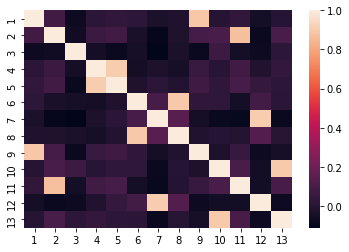

In [8]:
#4 cor matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(X_train.corr())
plt.show()

In [9]:
#6 weights
from sklearn.linear_model import LinearRegression
regr = LinearRegression().fit(X_train, Y_train)
coef = regr.coef_
coef

array([ 4.99282178e-01,  7.34495344e-04, -1.23500698e-04,  9.97114067e-01,
        3.75317125e-03,  2.99899528e+00, -3.99795386e+00,  2.82362584e-03,
        1.53761942e-03, -3.44473431e-03, -2.00008073e+00,  2.77965816e-04,
       -4.95620675e-01])

In [10]:
#7 b estimators
import numpy as np
X_train.insert(0, 0, 1)
X_train_T = X_train.transpose()
XtX = np.dot(X_train_T, X_train)
XtX_inv = np.linalg.inv(XtX)
X_prod = np.dot(XtX_inv, X_train_T)
b = np.dot(X_prod, Y_train)
b

array([ 9.99609120e+00,  4.99282178e-01,  7.34495344e-04, -1.23500698e-04,
        9.97114067e-01,  3.75317125e-03,  2.99899528e+00, -3.99795386e+00,
        2.82362584e-03,  1.53761942e-03, -3.44473431e-03, -2.00008073e+00,
        2.77965816e-04, -4.95620675e-01])

In [11]:
#8 error var
e = Y_train - np.dot(X_train, b)
mse = e.var()
mse

0.05011900457350562

In [12]:
#9 t vals
for i in range(1,len(b)):
    t_i = b[i] / (mse**0.5 * XtX_inv[i,i]**0.5)
    print('t_{}'.format(i), '=', abs(t_i))

t_1 = 156.4110135780695
t_2 = 0.2560670802056189
t_3 = 0.08821286739150737
t_4 = 304.64787140076817
t_5 = 1.2352795369495104
t_6 = 880.3487168365023
t_7 = 1113.6960911710144
t_8 = 0.9141988589786394
t_9 = 0.5359719176733461
t_10 = 1.162208304823856
t_11 = 617.0276566940228
t_12 = 0.09648870421704354
t_13 = 144.60304852581802


**Question 3:** *List variables that can be discarded.*

Based on t values, we need to drop variable 2, 3, 5, 8, 9, 10, 12, and 13. However, we cannot be certain about this conclusion because correlation matrix of all non-target features gives contradictory insight. We observed that some predictors are highly correlated, thus, can be dropped (for example, 10, 4, and 7)

In [13]:
#12 resid
resid = Y_train - np.dot(X_train, b)
resid

158    0.217098
150    0.219377
102   -0.310629
163    0.295508
112    0.266726
         ...   
203    0.128122
255   -0.356012
72    -0.078957
235    0.008159
37     0.156783
Name: 14, Length: 240, dtype: float64

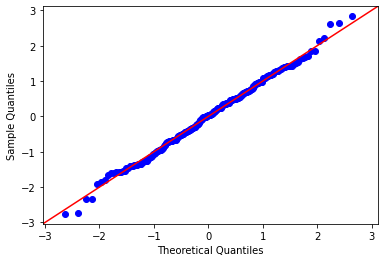

In [30]:
import statsmodels.api as sm
sm.qqplot(resid, line = "45", fit = True)
plt.show()


**Question 4:** *Is an error normally distributed, yes or no (based on Q-Q plot)?*

If we look at the QQ-plot above, we can clearly see residuals are normally distributed. It is because distribution follows a straight line.

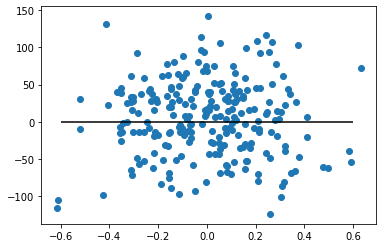

In [15]:
plt.scatter(resid, np.dot(X_train, b))
plt.hlines(0,-0.6,0.6, 'black')
plt.show()

**Question 5:** *If your error is not normal, what would you assume about the real distribution of an error (based on the latter plot)?*

Error is normal since distribution along horizontal line (y = 0) is the same above and below the line.

In [16]:
#16 r^2
Y_estimate = regr.predict(X_test)
def r_sq(Y_test, Y_estimate):
    sum_num = 0
    sum_denom = 0
    for i in range(len(Y_test)):
        diff_num = (Y_test.iloc[i] - Y_estimate[i])**2
        sum_num = sum_num + diff_num
        diff_denom = (Y_test.iloc[i] - Y_test.mean())**2
        sum_denom = sum_denom + diff_denom
    return 1 - sum_num / sum_denom 
r_sq(Y_test, Y_estimate)

0.9999834920131319

In [17]:
from sklearn.metrics import r2_score


In [19]:
r2_score(Y_test, Y_estimate)

0.9999834920131319

**Question 6:** *Give the final verdict: did linear regression model solved the prediction problem
or not?*

After all the work done, we can conclude that linear regression solved the prediction problem. Even though we had collinear features, and did not check other model assumptions, based on this scope of work, regression was well done since R squared is 0.9999834920131319 which is a good result. Normality assumption was checked in 2 ways that resulted in the same insight. Considering calculations and observations, the regression model was implemented successfully.